# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [43]:
import pandas as pd

# tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_2019.csv', encoding = "ISO-8859-1", sep = ';')
tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_2019.csv', encoding = "ISO-8859-1", sep = ';', chunksize=50000)

# y = pd.DataFrame(tabela)
y = 0

for x in tabela:
    y = x
    break

# Dados faltando
y = y.drop("DESC_CICLO_ENSINO", axis=1)
y = y.drop("DESC_TIPO_PROGRAMA", axis=1)
y = y.drop("CD_PARECER_CONCL_FIN", axis=1)
y = y.drop("DESC_PARECER_CONCL_FIN", axis=1)

# Não consta no dicionário de variáveis
y = y.drop("DUR_DIA_HORA", axis=1)
y = y.drop("DUR_DIA_MIN", axis=1)
# y = y.drop("X_SEMANA", axis=1)


In [44]:
y["DUR_DIA_TURMA"] = pd.to_numeric(y["DUR_DIA_TURMA"], errors="coerce")

y = y.dropna(how="any", axis=0)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41921 entries, 0 to 49999
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AN_LETIVO                 41921 non-null  int64  
 1   CD_UNIDADE_EDUCACAO       41921 non-null  int64  
 2   NOME_DISTRITO             41921 non-null  object 
 3   CD_SETOR                  41921 non-null  int64  
 4   TIPO_ESCOLA               41921 non-null  object 
 5   NOME_ESCOLA               41921 non-null  object 
 6   DRE                       41921 non-null  object 
 7   CD_INEP_ESCOLA            41921 non-null  float64
 8   SITUACAO_ESCOLA           41921 non-null  object 
 9   CD_TURMA                  41921 non-null  int64  
 10  CD_TURNO                  41921 non-null  int64  
 11  DESC_TURNO                41921 non-null  object 
 12  CD_SERIE                  41921 non-null  int64  
 13  DESC_SERIE                41921 non-null  object 
 14  MODALI

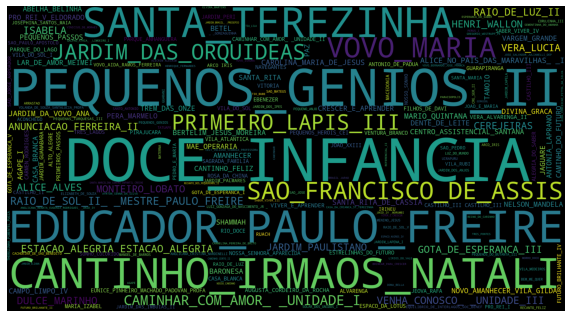

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = y['NOME_ESCOLA'].str.replace(',', '').str.replace(' ', '_').str.cat(sep=' ')
# print(text)
wordcloud = WordCloud(background_color="black",
                      width=1980, height=1080).generate(text)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("summary_wordcloud.png")

In [46]:
import plotly.graph_objects as go
import numpy as np

situacao = pd.DataFrame(columns=['Situacao', 'Quantidade'])

columns = ['SIT_AL_APROV', 'SIT_AL_REPROV', 'SIT_AL_ABAND', 'SIT_AL_CONCL', 'SIT_AL_TRANSF', 'SIT_AL_FALEC', 'SIT_AL_NCOM', 'SIT_AL_EXCL', 'SIT_AL_CES', 'SIT_AL_REMAN', 'SIT_AL_RECLAS', 'SIT_AL_ATIVO']
labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']

for idx, label in enumerate(labels):
    situacao.loc[idx] = list([label, np.sum(y[columns[idx]])])

# print(situacao)

fig = go.Figure(data=[go.Pie(labels=situacao['Situacao'], values=situacao['Quantidade'], hole=.3)])
fig.show()

In [47]:
labels = ['Superdotação', 'Autismo', 'Surdez leve', 'Surdez severa', 'Interlectual', 'Multipla', 'Cegueira', 'Baixa visão', 'Surdo Cegueira', 'Transtorno degenerativo', 'Aspeger', 'Rett', 'Fisica não cadeirante', 'Fisica cadeirante', 'Não possui']
doencaAluno = []

doencaAluno.append(np.sum(y['NEE_ALT_HAB']))
doencaAluno.append(np.sum(y['DEF__AUTISMO']))
doencaAluno.append(np.sum(y['DEF__SURDEZ_LEVE']))
doencaAluno.append(np.sum(y['DEF__SURDEZ_SEV']))
doencaAluno.append(np.sum(y['DEF__INTELECT']))
doencaAluno.append(np.sum(y['DEF__MULTIPLA']))
doencaAluno.append(np.sum(y['DEF__CEGUEIRA']))
doencaAluno.append(np.sum(y['DEF__BAIXA_VISAO']))
doencaAluno.append(np.sum(y['DEF__SURDO_CEG']))
doencaAluno.append(np.sum(y['DEF__TRANST_DES_INF']))
doencaAluno.append(np.sum(y['DEF__SINDR_ASPER']))
doencaAluno.append(np.sum(y['DEF__SINDR_RETT']))
doencaAluno.append(np.sum(y['DEF__FIS_N_CADEIR']))
doencaAluno.append(np.sum(y['DEF__FIS_CADEIR']))
doencaAluno.append(np.sum(y['DEF__N_POSSUI']))

fig = go.Figure(data=[go.Pie(labels=labels, values=doencaAluno)])
fig.show()
